In [ ]:
# The perpose of this project is to collect a years worth flight data through web scraping.

# The routes include Atlanta -> Fort Lauderdale, Los Angeles -> Las Vegas, Chicago -> Los Angeles, and
# New York(LGA) to Miami.  These 4 routes are some of the busiest in the USA.

# With this data, We can make charts analysing the most expensive days of the week, the most expensive time to 
# fly per year, and the most expensive airlines for each route 

# This project utilizes matplotlib, pandas, and beautiful soup


from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import datetime

# connect with selenium
options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)

driver = webdriver.Chrome(options=options)
driver.implicitly_wait(3)

#  These dates are used to loop through the website 

date = ['2023-12-16', '2023-12-17','2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31', '2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17','2024-01-18', '2024-01-19', '2024-01-20', '2024-01-21', '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27', '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05', '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-10', '2024-02-11', '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17','2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23', '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02', '2024-03-03', '2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07', '2024-03-08', '2024-03-09', '2024-03-10', '2024-03-11', '2024-03-12', '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-16', '2024-03-17','2024-03-18', '2024-03-19', '2024-03-20', '2024-03-21', '2024-03-22', '2024-03-23', '2024-03-24', '2024-03-25', '2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30', '2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-06', '2024-04-07', '2024-04-08', '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12', '2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17','2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-27', '2024-04-28', '2024-04-29', '2024-04-30', '2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10', '2024-05-11', '2024-05-12', '2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17','2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17','2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28', '2024-06-29', '2024-06-30', '2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12', '2024-07-13', '2024-07-14', '2024-07-15', '2024-07-16', '2024-07-17','2024-07-18', '2024-07-19', '2024-07-20', '2024-07-21', '2024-07-22', '2024-07-23', '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28', '2024-07-29', '2024-07-30', '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11', '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16', '2024-08-17','2024-08-18', '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24', '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-08', '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17','2024-09-18', '2024-09-19', '2024-09-20', '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-28', '2024-09-29', '2024-09-30', '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05', '2024-10-06', '2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17','2024-10-18', '2024-10-19', '2024-10-20', '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-26', '2024-10-27', '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31', '2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04', '2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08']

# The index of these dates correspond to the dates above.  These dates are later used to calculate the day of the week of each flight

day_of_week = [[2023, 12, 16], [2023, 12, 17], [2023, 12, 18], [2023, 12, 19], [2023, 12, 20], [2023, 12, 21], [2023, 12, 22], [2023, 12, 23], [2023, 12, 24], [2023, 12, 25], [2023, 12, 26], [2023, 12, 27], [2023, 12, 28], [2023, 12, 29], [2023, 12, 30], [2023, 12, 31],[2024, 1, 1], [2024, 1, 2], [2024, 1, 3], [2024, 1, 4], [2024, 1, 5], [2024, 1, 6], [2024, 1, 7], [2024, 1, 8], [2024, 1, 9], [2024, 1, 10], [2024, 1, 11], [2024, 1, 12], [2024, 1, 13], [2024, 1, 14], [2024, 1, 15], [2024, 1, 16], [2024, 1, 17], [2024, 1, 18], [2024, 1, 19], [2024, 1, 20], [2024, 1, 21], [2024, 1, 22], [2024, 1, 23], [2024, 1, 24], [2024, 1, 25], [2024, 1, 26], [2024, 1, 27], [2024, 1, 28], [2024, 1, 29], [2024, 1, 30], [2024, 1, 31], [2024, 2, 1], [2024, 2, 2], [2024, 2, 3], [2024, 2, 4], [2024, 2, 5], [2024, 2, 6], [2024, 2, 7], [2024, 2, 8], [2024, 2, 9], [2024, 2, 10], [2024, 2, 11], [2024, 2, 12], [2024, 2, 13], [2024, 2, 14], [2024, 2, 15], [2024, 2, 16], [2024, 2, 17], [2024, 2, 18], [2024, 2, 19], [2024, 2, 20], [2024, 2, 21], [2024, 2, 22], [2024, 2, 23], [2024, 2, 24], [2024, 2, 25], [2024, 2, 26], [2024, 2, 27], [2024, 2, 28], [2024, 2, 29], [2024, 3, 1], [2024, 3, 2], [2024, 3, 3], [2024, 3, 4], [2024, 3, 5], [2024, 3, 6], [2024, 3, 7], [2024, 3, 8], [2024, 3, 9], [2024, 3, 10], [2024, 3, 11], [2024, 3, 12], [2024, 3, 13], [2024, 3, 14], [2024, 3, 15], [2024, 3, 16], [2024, 3, 17], [2024, 3, 18], [2024, 3, 19], [2024, 3, 20], [2024, 3, 21], [2024, 3, 22], [2024, 3, 23], [2024, 3, 24], [2024, 3, 25], [2024, 3, 26], [2024, 3, 27], [2024, 3, 28], [2024, 3, 29], [2024, 3, 30], [2024, 3, 31], [2024, 4, 1], [2024, 4, 2], [2024, 4, 3], [2024, 4, 4], [2024, 4, 5], [2024, 4, 6], [2024, 4, 7], [2024, 4, 8], [2024, 4, 9], [2024, 4, 10], [2024, 6, 11], [2024, 4, 12], [2024, 4, 13], [2024, 4, 14], [2024, 4, 15], [2024, 4, 16], [2024, 4, 17], [2024, 4, 18], [2024, 4, 19], [2024, 4, 20], [2024, 4, 21], [2024, 4, 22], [2024, 4, 23], [2024, 4, 24], [2024, 4, 25], [2024, 4, 26], [2024, 4, 27], [2024, 4, 28], [2024, 4, 29], [2024, 4, 30], [2024, 5, 1], [2024, 5, 2], [2024, 5, 3], [2024, 5, 4], [2024, 5, 5], [2024, 5, 6], [2024, 5, 7], [2024, 5, 8], [2024, 5, 9], [2024, 5, 10], [2024, 5, 11], [2024, 5, 12], [2024, 5, 13], [2024, 5, 14], [2024, 5, 15], [2024, 5, 16], [2024, 5, 17], [2024, 5, 18], [2024, 5, 19], [2024, 5, 20], [2024, 5, 21], [2024, 5, 22], [2024, 5, 23], [2024, 5, 24], [2024, 5, 25], [2024, 5, 26], [2024, 5, 27], [2024, 5, 28], [2024, 5, 29], [2024, 5, 30], [2024, 5, 31], [2024, 6, 1], [2024, 6, 2], [2024, 6, 3], [2024, 6, 4], [2024, 6, 5], [2024, 6, 6], [2024, 6, 7], [2024, 6, 8], [2024, 6, 9], [2024, 6, 10], [2024, 6, 11], [2024, 6, 12], [2024, 6, 13], [2024, 6, 14], [2024, 6, 15], [2024, 6, 16], [2024, 6, 17], [2024, 6, 18], [2024, 6, 19], [2024, 6, 20], [2024, 6, 21], [2024, 6, 22], [2024, 6, 23], [2024, 6, 24], [2024, 6, 25], [2024, 6, 26], [2024, 6, 27], [2024, 6, 28], [2024, 6, 29], [2024, 6, 30], [2024, 7, 1], [2024, 7, 2], [2024, 7, 3], [2024, 7, 4], [2024, 7, 5], [2024, 7, 6], [2024, 7, 7], [2024, 7, 8], [2024, 7, 9], [2024, 7, 10], [2024, 7, 11], [2024, 7, 12], [2024, 7, 13], [2024, 7, 14], [2024, 7, 15], [2024, 7, 16], [2024, 7, 17], [2024, 7, 18], [2024, 7, 19], [2024, 7, 20], [2024, 7, 21], [2024, 7, 22], [2024, 7, 23], [2024, 7, 24], [2024, 7, 25], [2024, 7, 26], [2024, 7, 27], [2024, 7, 28], [2024, 7, 29], [2024, 7, 30], [2024, 7, 31], [2024, 8, 1], [2024, 8, 2], [2024, 8, 3], [2024, 8, 4], [2024, 8, 5], [2024, 8, 6], [2024, 8, 7], [2024, 8, 8], [2024, 8, 9], [2024, 8, 10], [2024, 8, 11], [2024, 8, 12], [2024, 8, 13], [2024, 8, 14], [2024, 8, 15], [2024, 8, 16], [2024, 8, 17], [2024, 8, 18], [2024, 8, 19], [2024, 8, 20], [2024, 8, 21], [2024, 8, 22], [2024, 8, 23], [2024, 8, 24], [2024, 8, 25], [2024, 8, 26], [2024, 8, 27], [2024, 8, 28], [2024, 8, 29], [2024, 8, 30], [2024, 8, 31], [2024, 9, 1], [2024, 9, 2], [2024, 9, 3], [2024, 9, 4], [2024, 9, 5], [2024, 9, 6], [2024, 9, 7], [2024, 9, 8], [2024, 9, 9], [2024, 9, 10], [2024, 9, 11], [2024, 9, 12], [2024, 9, 13], [2024, 9, 14], [2024, 9, 15], [2024, 9, 16], [2024, 9, 17], [2024, 9, 18], [2024, 9, 19], [2024, 9, 20], [2024, 9, 21], [2024, 9, 22], [2024, 9, 23], [2024, 9, 24], [2024, 9, 25], [2024, 9, 26], [2024, 9, 27], [2024, 9, 28], [2024, 9, 29], [2024, 9, 30], [2024, 10, 1], [2024, 10, 2], [2024, 10, 3], [2024, 10, 4], [2024, 10, 5], [2024, 10, 6], [2024, 10, 7], [2024, 10, 8], [2024, 10, 9], [2024, 10, 10], [2024, 10, 11], [2024, 10, 12], [2024, 10, 13], [2024, 10, 14], [2024, 10, 15], [2024, 10, 16], [2024, 10, 17], [2024, 10, 18], [2024, 10, 19], [2024, 10, 20], [2024, 10, 21], [2024, 10, 22], [2024, 10, 23], [2024, 10, 24], [2024, 10, 25], [2024, 10, 26], [2024, 10, 27], [2024, 10, 28], [2024, 10, 29], [2024, 10, 30], [2024, 10, 31], [2024, 11, 1], [2024, 11, 2], [2024, 11, 3], [2024, 11, 4], [2024, 11, 5], [2024, 11, 6], [2024, 11, 7], [2024, 11, 8]]

# The Array below is used to save each row of flights (then it is ultimately pushed into the csv file)

flights = []

# The below code Loops through each day and collects information on each flight

# The Airline, Price, and flight Duration are taken from kayak.com, while the 
# Origin City, Origin Airport, Destination City, Destination Airport, Date, Weekday, And Mileage length of route are hard coded.

# The below code can only run through one route at a time (I.E. LGA-MIA), and can run into issues if there is a 'are you a robot' check in kayak.com.  If so, then the dates above would need to be run in smaller increments at a time.

for i in range(5083):

    # connect to website
    url = f'https://www.kayak.com/flights/LGA-MIA/{date[i]}?sort=bestflight_a'

    driver.get(url)

    flight_rows = driver.find_elements('xpath', '//div[@class="nrc6-inner"]')

    # calc the weekday of the flight
    x_date = datetime.date(day_of_week[i][0], day_of_week[i][1], day_of_week[i][2])

    #  gather info for each flight
    for web_element in flight_rows:
        element_HTML = web_element.get_attribute('outerHTML')
        soup = BeautifulSoup(element_HTML, 'html.parser')

        airline = soup.find('div', {'class': 'c_cgF c_cgF-mod-variant-default'}).text

        price = soup.find('div', {'class': 'f8F1-price-text'}).text
        price = float(price[1:])

        element = soup.find('div', {'class': 'xdW8'})
        duration = element.find('div', {'class': 'vmXl vmXl-mod-variant-default'}).text
        duration = duration.replace(' ', '').replace('h', ':').replace('m', '')

        # append info into the flights array, a pandas data frame, then into a csv file
        flights.append(['New York', 'LGA', 'Miami', 'MIA', date[i], x_date.weekday(), airline, price, duration, 1097])
        if len(flights) == 471:
            df = pd.DataFrame(flights, columns=['Origin City', 'Origin Airport', 'Dest. City', 'Dest Airport', 'Flight Date', 'Day of Week', 'Airline', 'Price', 'Duration', 'Miles'])
            df.to_csv(r'/home/aaronolson95/Downloads/Flights.csv', index = False, mode = 'a')


In [1]:
# Lets see a sample of the ticket information gathered above

import pandas as pd

pd.set_option('display.max_columns', 20)
df = pd.read_csv(r"/home/aaronolson95/Downloads/Flights.csv")
df

,Origin City,Origin Airport,Dest. City,Dest Airport,Flight Date,Day of Week,Airline,Price,Duration,Miles
0,Atlanta,ATL,Fort Lauderdale,FLL,2023-12-15,4,Delta,329,1:58,582
1,Atlanta,ATL,Fort Lauderdale,FLL,2023-12-15,4,Spirit Airlines,209,1:57,582
2,Atlanta,ATL,Fort Lauderdale,FLL,2023-12-15,4,JetBlue,254,1:49,582
3,Atlanta,ATL,Fort Lauderdale,FLL,2023-12-15,4,Spirit Airlines,254,1:59,582
4,Atlanta,ATL,Fort Lauderdale,FLL,2023-12-15,4,Spirit Airlines,320,1:57,582
...,...,...,...,...,...,...,...,...,...,...
20634,New York,LGA,Miami,MIA,2024-11-08,4,American Airlines,144,3:23,1097
20635,New York,LGA,Miami,MIA,2024-11-08,4,American Airlines,144,3:31,1097
20636,New York,LGA,Miami,MIA,2024-11-08,4,American Airlines,243,3:12,1097
20637,New York,LGA,Miami,MIA,2024-11-08,4,American Airlines,243,3:17,1097


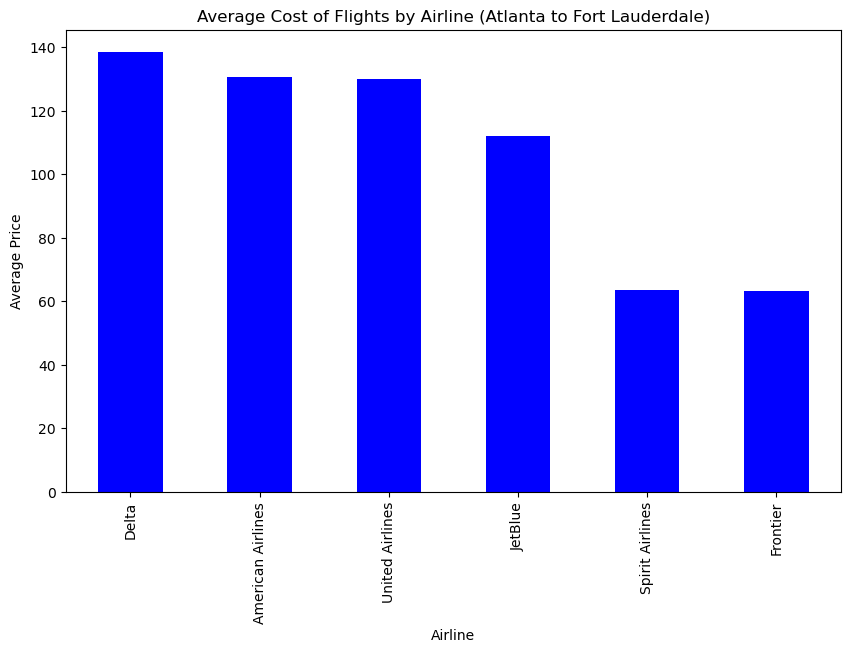

In [32]:
# Lets make some charts using using Pandas, Matplotlib, and the data gathered above

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import the CSV file
pd.set_option('display.max_columns', 20)
df = pd.read_csv(r"/home/aaronolson95/Downloads/Flights.csv")

# The Weekdays come as 0, 1, 2, 3, 4, 5, 6... and they need to be converted to 'Monday'.. etc
conditions = [
    (df['Day of Week'] == 0),
    (df['Day of Week'] == 1),
    (df['Day of Week'] == 2),
    (df['Day of Week'] == 3),
    (df['Day of Week'] == 4),
    (df['Day of Week'] == 5),
    (df['Day of Week'] == 6)
]

values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Weekday'] = np.select(conditions, values)


# creates a 'Price Per Mile' Column which will be used in the charts
df['Price Per Mile'] = df['Miles'] / df['Price']


# filters the first chart for the Atlanta - Fort Lauderdale route

Atlanta = df[df['Origin City'] == 'Atlanta']
Atlanta = Atlanta[Atlanta['Airline'] != 'Frontier, Spirit Airlines']

Average_Price = Atlanta.groupby('Airline')['Price'].mean()
AP_Sorted = Average_Price.sort_values(ascending=False)
AP_Sorted.plot(kind='bar', xlabel="Airline", ylabel="Average Price", title=
"Average Cost of Flights by Airline (Atlanta to Fort Lauderdale)", figsize=(10,6), 
color='blue')
plt.show()

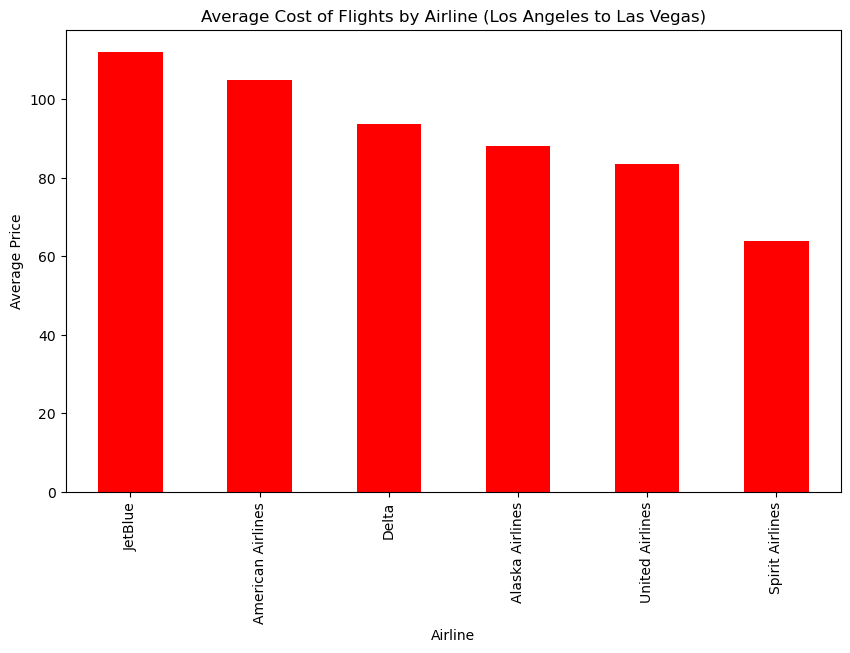

In [33]:
# The second chart for the Los Angeles - Las Vegas route

Los_Angeles = df[df['Origin City'] == 'Los Angeles']
Los_Angeles = Los_Angeles[Los_Angeles['Airline'] != 'Greyhound']
Los_Angeles = Los_Angeles[Los_Angeles['Airline'] != 'Las Vegas Shuttles Corporation']

Average_Price = Los_Angeles.groupby('Airline')['Price'].mean()
AP_Sorted = Average_Price.sort_values(ascending=False)
AP_Sorted.plot(kind='bar', xlabel="Airline", ylabel="Average Price", title=
"Average Cost of Flights by Airline (Los Angeles to Las Vegas)", figsize=(10,6), 
color='red')
plt.show()

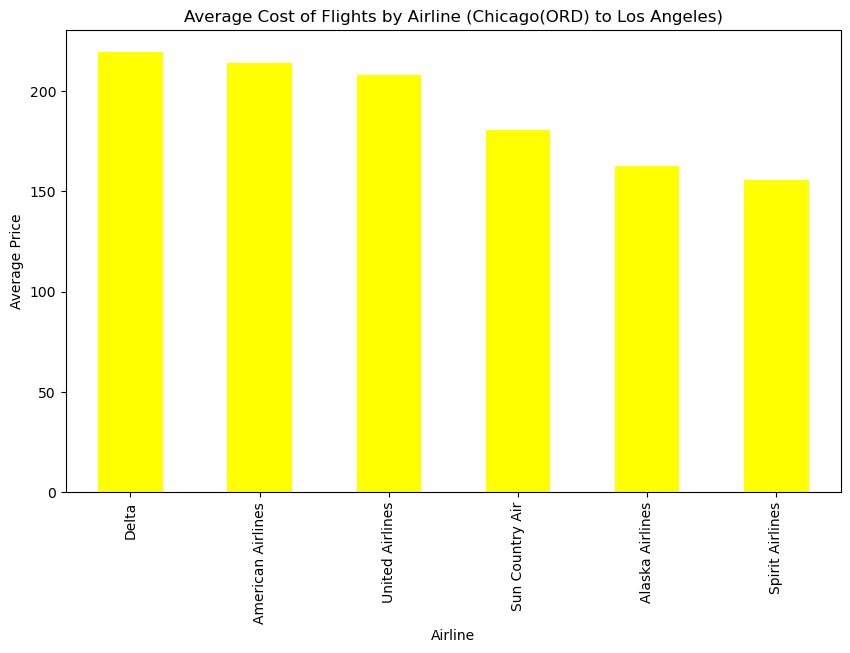

In [35]:
# The third chart for the Chicago - Los Angeles route

Chicago = df[df['Origin City'] == 'Chicago']
Chicago = Chicago[Chicago['Airline'] != 'Sun Country Air, Spirit Airlines']
Chicago = Chicago[Chicago['Airline'] != 'Multiple airlines']
Chicago = Chicago[Chicago['Airline'] != 'Frontier, Spirit Airlines']

Average_Price = Chicago.groupby('Airline')['Price'].mean()
AP_Sorted = Average_Price.sort_values(ascending=False)
AP_Sorted.plot(kind='bar', xlabel="Airline", ylabel="Average Price", title=
"Average Cost of Flights by Airline (Chicago(ORD) to Los Angeles)", figsize=(10,6), 
color='yellow')
plt.show()

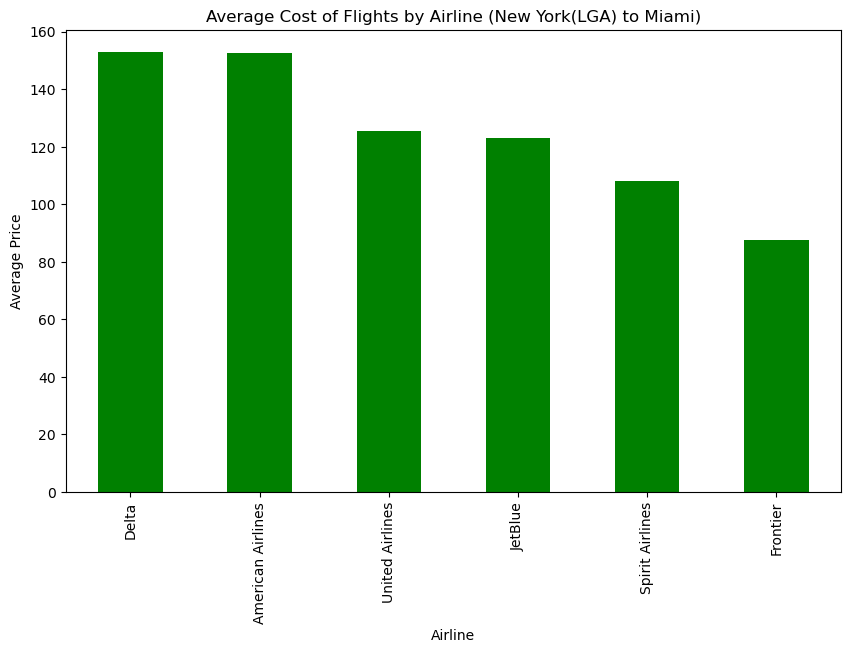

In [5]:
# Chart five for the New York(LGA) - Miami route

New_York = df[df['Origin City'] == 'New York']
New_York = New_York[New_York['Airline'] != 'Spirit Airlines, Frontier']
New_York = New_York[New_York['Airline'] != 'Frontier, Spirit Airlines']

Average_Price = New_York.groupby('Airline')['Price'].mean()
AP_Sorted = Average_Price.sort_values(ascending=False)
AP_Sorted.plot(kind='bar', xlabel="Airline", ylabel="Average Price", title=
"Average Cost of Flights by Airline (New York(LGA) to Miami)", figsize=(10,6), 
color='green')
plt.show()

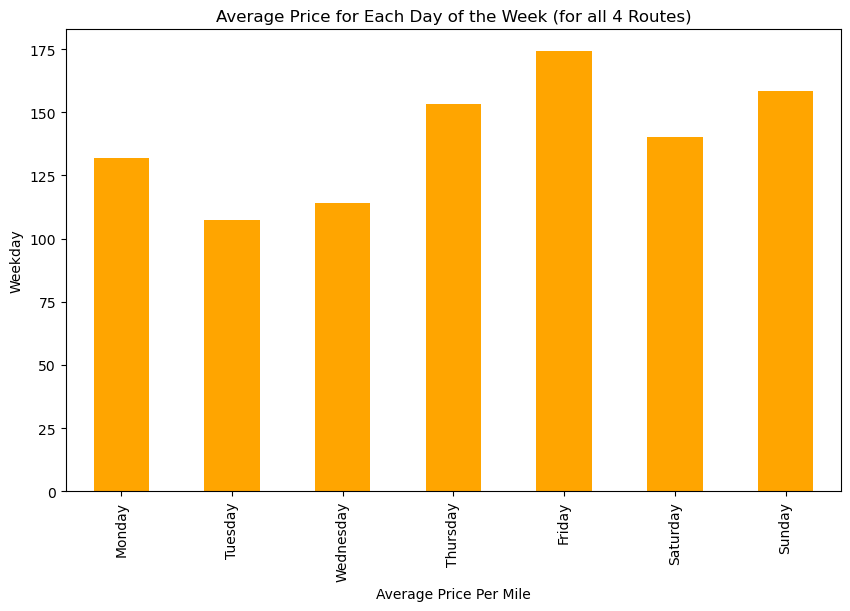

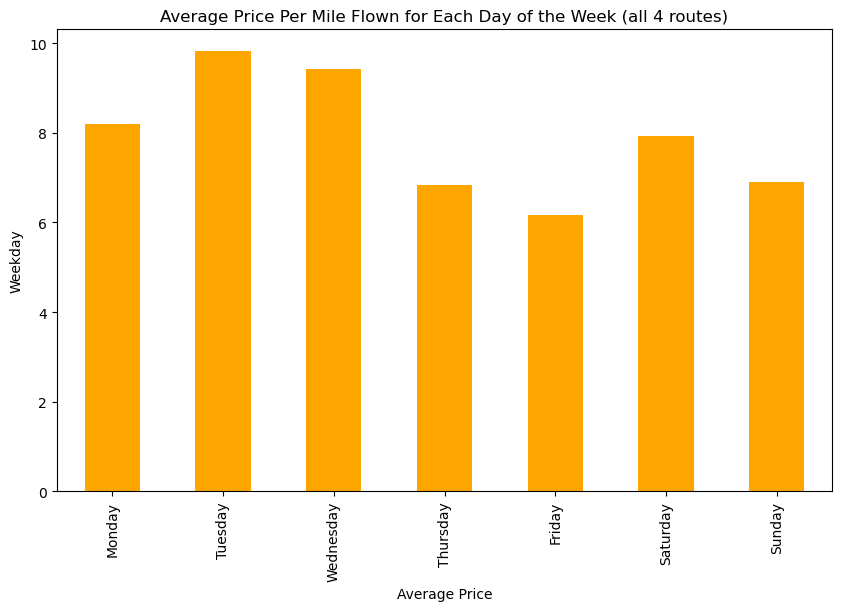

In [36]:
# Chart five and six shows the expense of flying throughout the week

# Lets make some charts using using Pandas, Matplotlib, and the data gathered above

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import the CSV file
pd.set_option('display.max_columns', 20)
df = pd.read_csv(r"/home/aaronolson95/Downloads/Flights.csv")

# The Weekdays come as 0, 1, 2, 3, 4, 5, 6... and they need to be converted to 'Monday'.. etc
conditions = [
    (df['Day of Week'] == 0),
    (df['Day of Week'] == 1),
    (df['Day of Week'] == 2),
    (df['Day of Week'] == 3),
    (df['Day of Week'] == 4),
    (df['Day of Week'] == 5),
    (df['Day of Week'] == 6)
]

values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Weekday'] = np.select(conditions, values)


# creates a 'Price Per Mile' Column which will be used in the charts
df['Price Per Mile'] = df['Miles'] / df['Price']

Average_Price = df.groupby('Weekday')['Price'].mean()
Average_Price = Average_Price.groupby(['Weekday']).sum().reindex(values)
Average_Price.plot(kind='bar', xlabel="Average Price Per Mile", ylabel="Weekday", title="Average Price for Each Day of the Week (for all 4 Routes)", 
figsize=(10,6), color='orange')
plt.show()

Average_Price_Per_Mile = df.groupby('Weekday')['Price Per Mile'].mean()
Average_Price_Per_Mile = Average_Price_Per_Mile.groupby(['Weekday']).sum().reindex(values)
Average_Price_Per_Mile.plot(kind='bar', xlabel="Average Price", ylabel="Weekday", title="Average Price Per Mile Flown for Each Day of the Week (all 4 routes)", 
figsize=(10,6), color='orange')
plt.show()

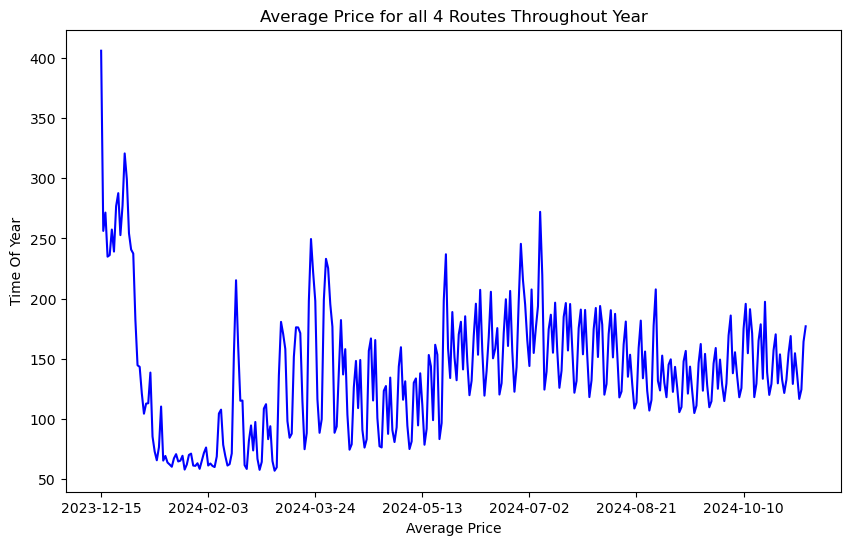

In [11]:
# Chart 7 shows the average price for all 4 routes throughout year 
# (note the jagged weekly cycle of price swings throughout the year)

Average_Price = df.groupby('Flight Date')['Price'].mean()
Average_Price.plot(kind='line', xlabel="Average Price", ylabel="Time Of Year", title="Average Price for all 4 Routes Throughout Year", figsize=(10,6), 
color='blue')
plt.show()


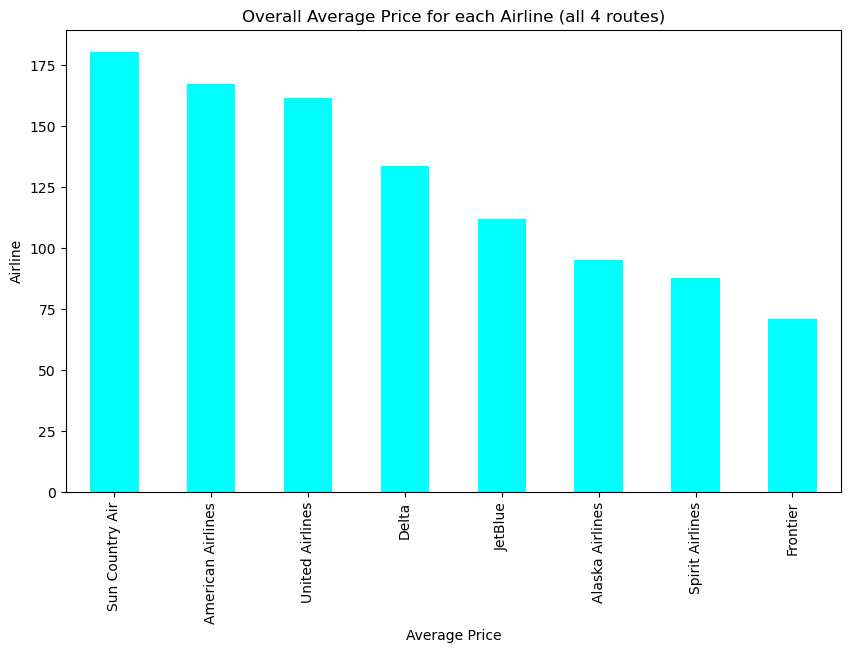

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import the CSV file
pd.set_option('display.max_columns', 20)
df = pd.read_csv(r"/home/aaronolson95/Downloads/Flights.csv")

# The Weekdays come as 0, 1, 2, 3, 4, 5, 6... and they need to be converted to 'Monday'.. etc
conditions = [
    (df['Day of Week'] == 0),
    (df['Day of Week'] == 1),
    (df['Day of Week'] == 2),
    (df['Day of Week'] == 3),
    (df['Day of Week'] == 4),
    (df['Day of Week'] == 5),
    (df['Day of Week'] == 6)
]

values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Weekday'] = np.select(conditions, values)


# creates a 'Price Per Mile' Column which will be used in the charts
df['Price Per Mile'] = df['Miles'] / df['Price']

# Chart 8 and 9 shows the average price per Mile for All Airlines

df = df[df['Airline'] != 'Spirit Airlines, Frontier']
df = df[df['Airline'] != 'Sun Country Air, Spirit Airlines']
df = df[df['Airline'] != 'Frontier, Spirit Airlines']
df = df[df['Airline'] != 'Multiple airlines']
df = df[df['Airline'] != 'Las Vegas Shuttles Corporation']
df = df[df['Airline'] != 'Greyhound']
df = df.groupby('Airline')['Price'].mean()
AP_Sorted = df.sort_values(ascending=False)
AP_Sorted.plot(kind='bar', xlabel="Average Price", ylabel="Airline", title="Overall Average Price for each Airline (all 4 routes)", figsize=(10,6), 
color='cyan')
plt.show()


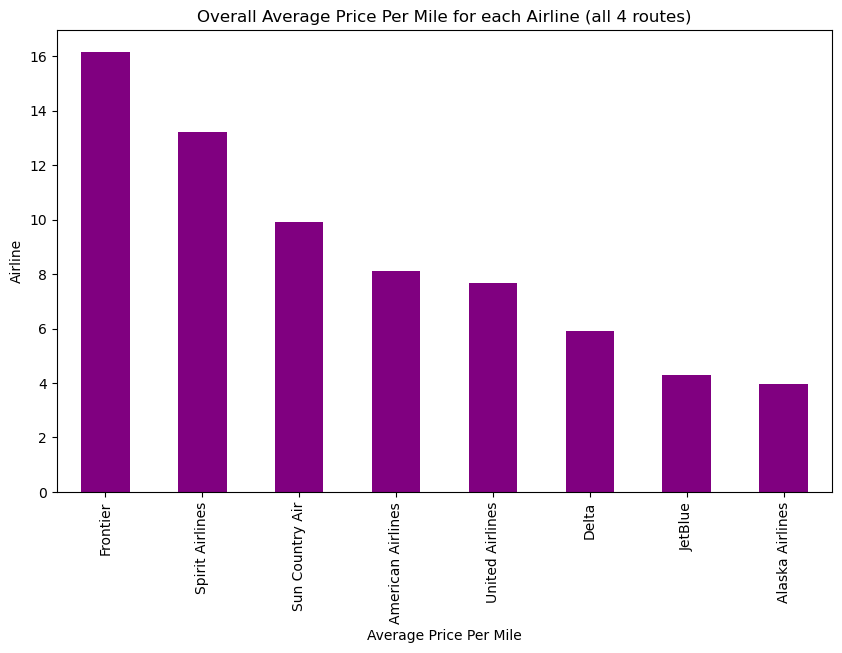

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import the CSV file
pd.set_option('display.max_columns', 20)
df = pd.read_csv(r"/home/aaronolson95/Downloads/Flights.csv")

# The Weekdays come as 0, 1, 2, 3, 4, 5, 6... and they need to be converted to 'Monday'.. etc
conditions = [
    (df['Day of Week'] == 0),
    (df['Day of Week'] == 1),
    (df['Day of Week'] == 2),
    (df['Day of Week'] == 3),
    (df['Day of Week'] == 4),
    (df['Day of Week'] == 5),
    (df['Day of Week'] == 6)
]

values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Weekday'] = np.select(conditions, values)


# creates a 'Price Per Mile' Column which will be used in the charts
df['Price Per Mile'] = df['Miles'] / df['Price']

# Chart 8 and 9 shows the average price per Mile for All Airlines

df = df[df['Airline'] != 'Spirit Airlines, Frontier']
df = df[df['Airline'] != 'Sun Country Air, Spirit Airlines']
df = df[df['Airline'] != 'Frontier, Spirit Airlines']
df = df[df['Airline'] != 'Multiple airlines']
df = df[df['Airline'] != 'Las Vegas Shuttles Corporation']
df = df[df['Airline'] != 'Greyhound']
df = df.groupby('Airline')['Price Per Mile'].mean()
AP_Sorted = df.sort_values(ascending=False)
AP_Sorted.plot(kind='bar', xlabel="Average Price Per Mile", ylabel="Airline", title="Overall Average Price Per Mile for each Airline (all 4 routes)", figsize=(10,6), 
color='purple')
plt.show()